## Import libraries

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler

## Import the CSV files

In [2]:
data_df = pd.read_csv('train.csv')
input_df = pd.read_csv('test.csv')

In [3]:
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Identifying categorical, ordinal, and interval features

In [4]:
data_df['ExterQual'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

data_df['ExterCond'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

data_df['BsmtQual'].replace({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}, inplace=True)

data_df['BsmtCond'].replace({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}, inplace=True)

data_df['Fence'].replace({
    'NA': 0,
    'MnWw': 1,
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4,
}, inplace=True)

data_df['LandContour'].replace({
    'Low': 0,
    'HLS': 1,
    'Bnk': 2,
    'Lvl': 3
}, inplace=True)

data_df['Utilities'].replace({
    'ELO': 0,
    'NoSeWa': 1,
    'NoSewr': 2,
    'AllPub': 3
}, inplace=True)

data_df['LandSlope'].replace({
    'Sev': 0,
    'Mod': 1,
    'Gtl': 2
}, inplace=True)

data_df['BsmtExposure'].replace({
    'NA': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}, inplace=True)

data_df['BsmtFinType1'].replace({
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}, inplace=True)

data_df['BsmtFinType2'].replace({
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}, inplace=True)

data_df['HeatingQC'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4,
}, inplace=True)

data_df['Electrical'].replace({
    'Mix': 0,
    'FuseP': 1,
    'FuseF': 2,
    'FuseA': 3,
    'SBrkr': 4
}, inplace=True)

data_df['KitchenQual'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

data_df.drop([
    'Id',
    'MSSubClass',
    'Street',
    'Alley',
    'LotShape',
    'LotConfig',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'YearRemodAdd',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    ####
    'Heating',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'MiscFeature',
    'SaleType',
    'SaleCondition'
], axis=1, inplace=True)

data_df['Foundation'] = pd.Categorical(data_df['Foundation'])
data_df['MSZoning'] = pd.Categorical(data_df['MSZoning'])
data_df['Neighborhood'] = pd.Categorical(data_df['Neighborhood'])
data_df['RoofStyle'] = pd.Categorical(data_df['RoofStyle'])
data_df['CentralAir'] = pd.Categorical(data_df['CentralAir'])

### Do the same with the input dataframe

In [5]:
input_df['ExterQual'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

input_df['ExterCond'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

input_df['BsmtQual'].replace({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4, 'Ex': 5
}, inplace=True)

input_df['BsmtCond'].replace({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}, inplace=True)

input_df['Fence'].replace({
    'NA': 0,
    'MnWw': 1,
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4,
}, inplace=True)

input_df['LandContour'].replace({
    'Low': 0,
    'HLS': 1,
    'Bnk': 2,
    'Lvl': 3
}, inplace=True)

input_df['Utilities'].replace({
    'ELO': 0,
    'NoSeWa': 1,
    'NoSewr': 2,
    'AllPub': 3
}, inplace=True)

input_df['LandSlope'].replace({
    'Sev': 0,
    'Mod': 1,
    'Gtl': 2
}, inplace=True)

input_df['BsmtExposure'].replace({
    'NA': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}, inplace=True)

input_df['BsmtFinType1'].replace({
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}, inplace=True)

input_df['BsmtFinType2'].replace({
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}, inplace=True)

input_df['HeatingQC'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4,
}, inplace=True)

input_df['Electrical'].replace({
    'Mix': 0,
    'FuseP': 1,
    'FuseF': 2,
    'FuseA': 3,
    'SBrkr': 4
}, inplace=True)

input_df['KitchenQual'].replace({
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

input_Id = input_df['Id']

input_df.drop([
    'Id',
    'MSSubClass',
    'Street',
    'Alley',
    'LotShape',
    'LotConfig',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'YearRemodAdd',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    ####
    'Heating',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'MiscFeature',
    'SaleType',
    'SaleCondition'
], axis=1, inplace=True)

input_df['Foundation'] = pd.Categorical(input_df['Foundation'])
input_df['MSZoning'] = pd.Categorical(input_df['MSZoning'])
input_df['Neighborhood'] = pd.Categorical(input_df['Neighborhood'])
input_df['RoofStyle'] = pd.Categorical(input_df['RoofStyle'])
input_df['CentralAir'] = pd.Categorical(input_df['CentralAir'])

## One hot encoding and drop dummy variables

In [6]:
data_df = pd.get_dummies(data_df, drop_first=True)
input_df = pd.get_dummies(input_df, drop_first=True)

## Fill NaN with hardcoded value (0 for now)

In [7]:
data_df.fillna(0, inplace=True)
input_df.fillna(0, inplace=True)

## Select the relevant features

These features are selected only by intuition. Let's try first if this will yield a good result.

In [8]:
X_train = data_df.loc[:, data_df.columns != 'SalePrice']
y_train = data_df['SalePrice']

X_input = input_df.loc[:, input_df.columns != 'SalePrice']

## Feature scaling using StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_input = scaler.transform(X_input)

0.1836139858024392

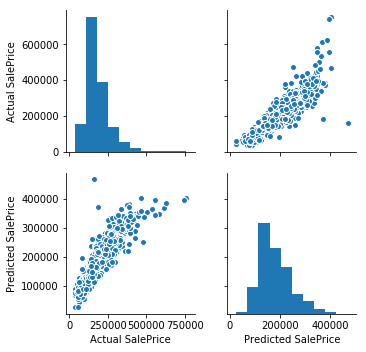

In [10]:
clf = ElasticNet()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train).clip(min=1)
sns.pairplot(pd.DataFrame({'Actual SalePrice': y_train, 'Predicted SalePrice': y_train_pred}))
math.sqrt(mean_squared_error(np.log(y_train), np.log(y_train_pred)))

### Exploratory Data Analysis

#### Let's graph each features with respect to the house price

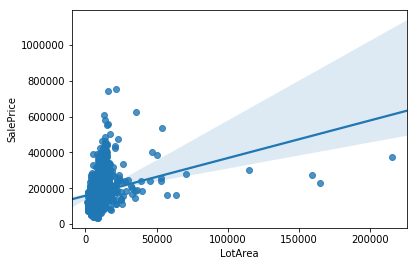

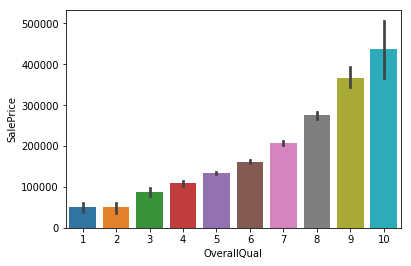

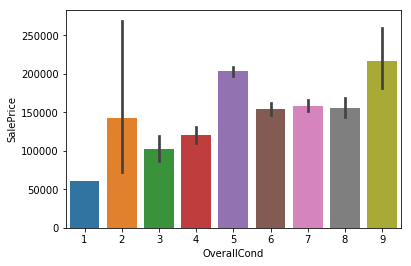

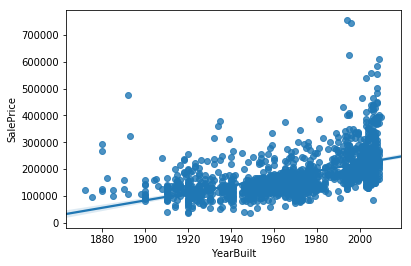

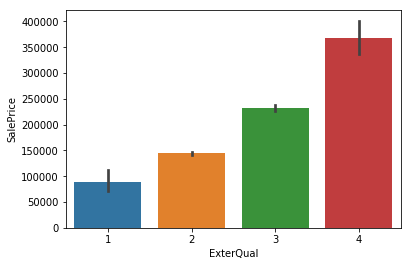

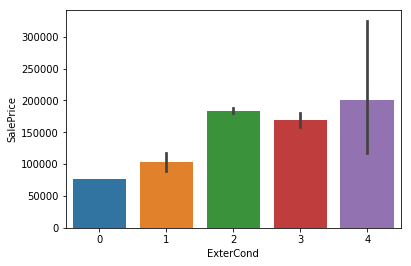

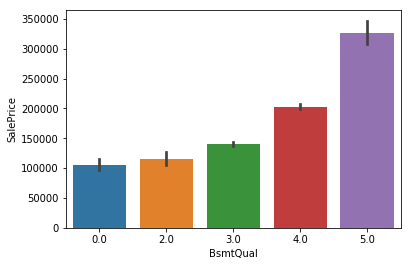

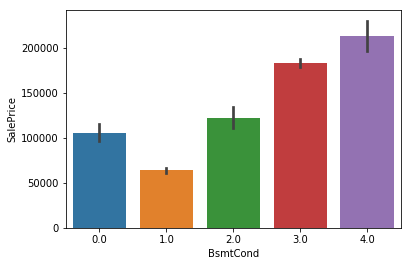

In [11]:
plt.figure()
sns.regplot(data_df['LotArea'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['OverallQual'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['OverallCond'], data_df['SalePrice'])
plt.figure()
sns.regplot(data_df['YearBuilt'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['ExterQual'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['ExterCond'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['BsmtQual'], data_df['SalePrice'])
plt.figure()
sns.barplot(data_df['BsmtCond'], data_df['SalePrice'])

## Create the dataframe for the result and write to a CSV file for submission

In [12]:
result_df = pd.DataFrame({
    'Id': input_Id,
    'SalePrice': pd.Series(clf.predict(X_input))
})

result_df.to_csv('result.csv', index=False)